In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split


data = pd.read_csv('heart_attack_prediction_dataset.csv')
data = data.drop(columns=['Patient ID'])


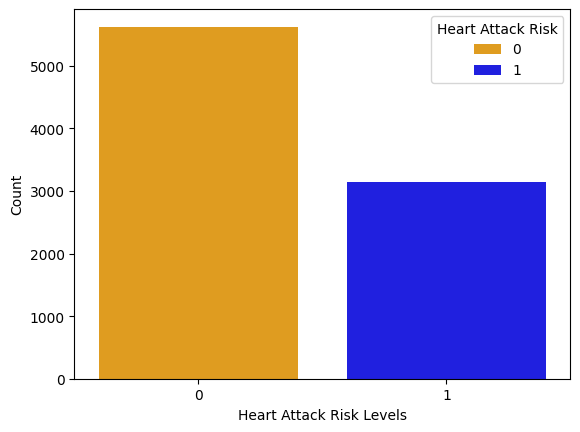

In [2]:
sns.countplot(x='Heart Attack Risk', data=data, hue='Heart Attack Risk', palette=['orange', 'blue'])
plt.xlabel('Heart Attack Risk Levels')
plt.ylabel('Count')
plt.show()

In [3]:
duplicate_count = data.duplicated().sum()
if duplicate_count > 0:
    data = data.drop_duplicates()

In [4]:
null_data_count = data.isnull().sum().sum()
if null_data_count > 0:
    data.dropna(axis=1,inplace = True)
print(null_data_count)

0


In [5]:
data['Systolic pressure']  = pd.to_numeric(data['Blood Pressure'].str.split('/').str[0])
data['Diastolic pressure']  = pd.to_numeric(data['Blood Pressure'].str.split('/').str[1])
data.drop('Blood Pressure' , axis=1 , inplace = True)
data

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,Systolic pressure,Diastolic pressure
0,67,Male,208,72,0,0,1,0,0,4.168189,...,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88
1,21,Male,389,98,1,1,1,1,1,1.813242,...,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93
2,21,Female,324,72,1,0,0,0,0,2.078353,...,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99
3,84,Male,383,73,1,1,1,0,1,9.828130,...,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100
4,66,Male,318,93,1,1,1,1,0,5.804299,...,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,Male,121,61,1,1,1,0,1,7.917342,...,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76
8759,28,Female,120,73,1,0,0,1,0,16.558426,...,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102
8760,47,Male,250,105,0,1,1,1,1,3.148438,...,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75
8761,36,Male,178,60,1,0,1,0,0,3.789950,...,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67


In [6]:
data_encoded = pd.get_dummies(data, columns=['Sex', 'Continent', 'Hemisphere'], dtype=int) #One Hot Encoding 
data = data_encoded

In [7]:

country_list = data['Country'].apply(lambda x: [x]) # Hash Encoding 

hasher = FeatureHasher(n_features=10, input_type='string')

hashed_features = hasher.transform(country_list)

hashed_df = pd.DataFrame(hashed_features.toarray(), columns=[f'Country_hash_{i}' for i in range(10)])

data_encoded = pd.concat([data, hashed_df], axis=1)
data_encoded = data_encoded.drop(columns=['Country'])

data = data_encoded

In [8]:
data['Diet'] = data['Diet'].astype('category').cat.codes #label Encoding
data

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Country_hash_0,Country_hash_1,Country_hash_2,Country_hash_3,Country_hash_4,Country_hash_5,Country_hash_6,Country_hash_7,Country_hash_8,Country_hash_9
0,67,208,72,0,0,1,0,0,4.168189,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,21,389,98,1,1,1,1,1,1.813242,2,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21,324,72,1,0,0,0,0,2.078353,1,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,84,383,73,1,1,1,0,1,9.828130,0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,66,318,93,1,1,1,1,0,5.804299,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
8759,28,120,73,1,0,0,1,0,16.558426,1,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8760,47,250,105,0,1,1,1,1,3.148438,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8761,36,178,60,1,0,1,0,0,3.789950,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data_set_types = data.dtypes
data_set_types

Age                                  int64
Cholesterol                          int64
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                  int8
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Systolic pressure                    int64
Diastolic pressure                   int64
Sex_Female                           int64
Sex_Male   

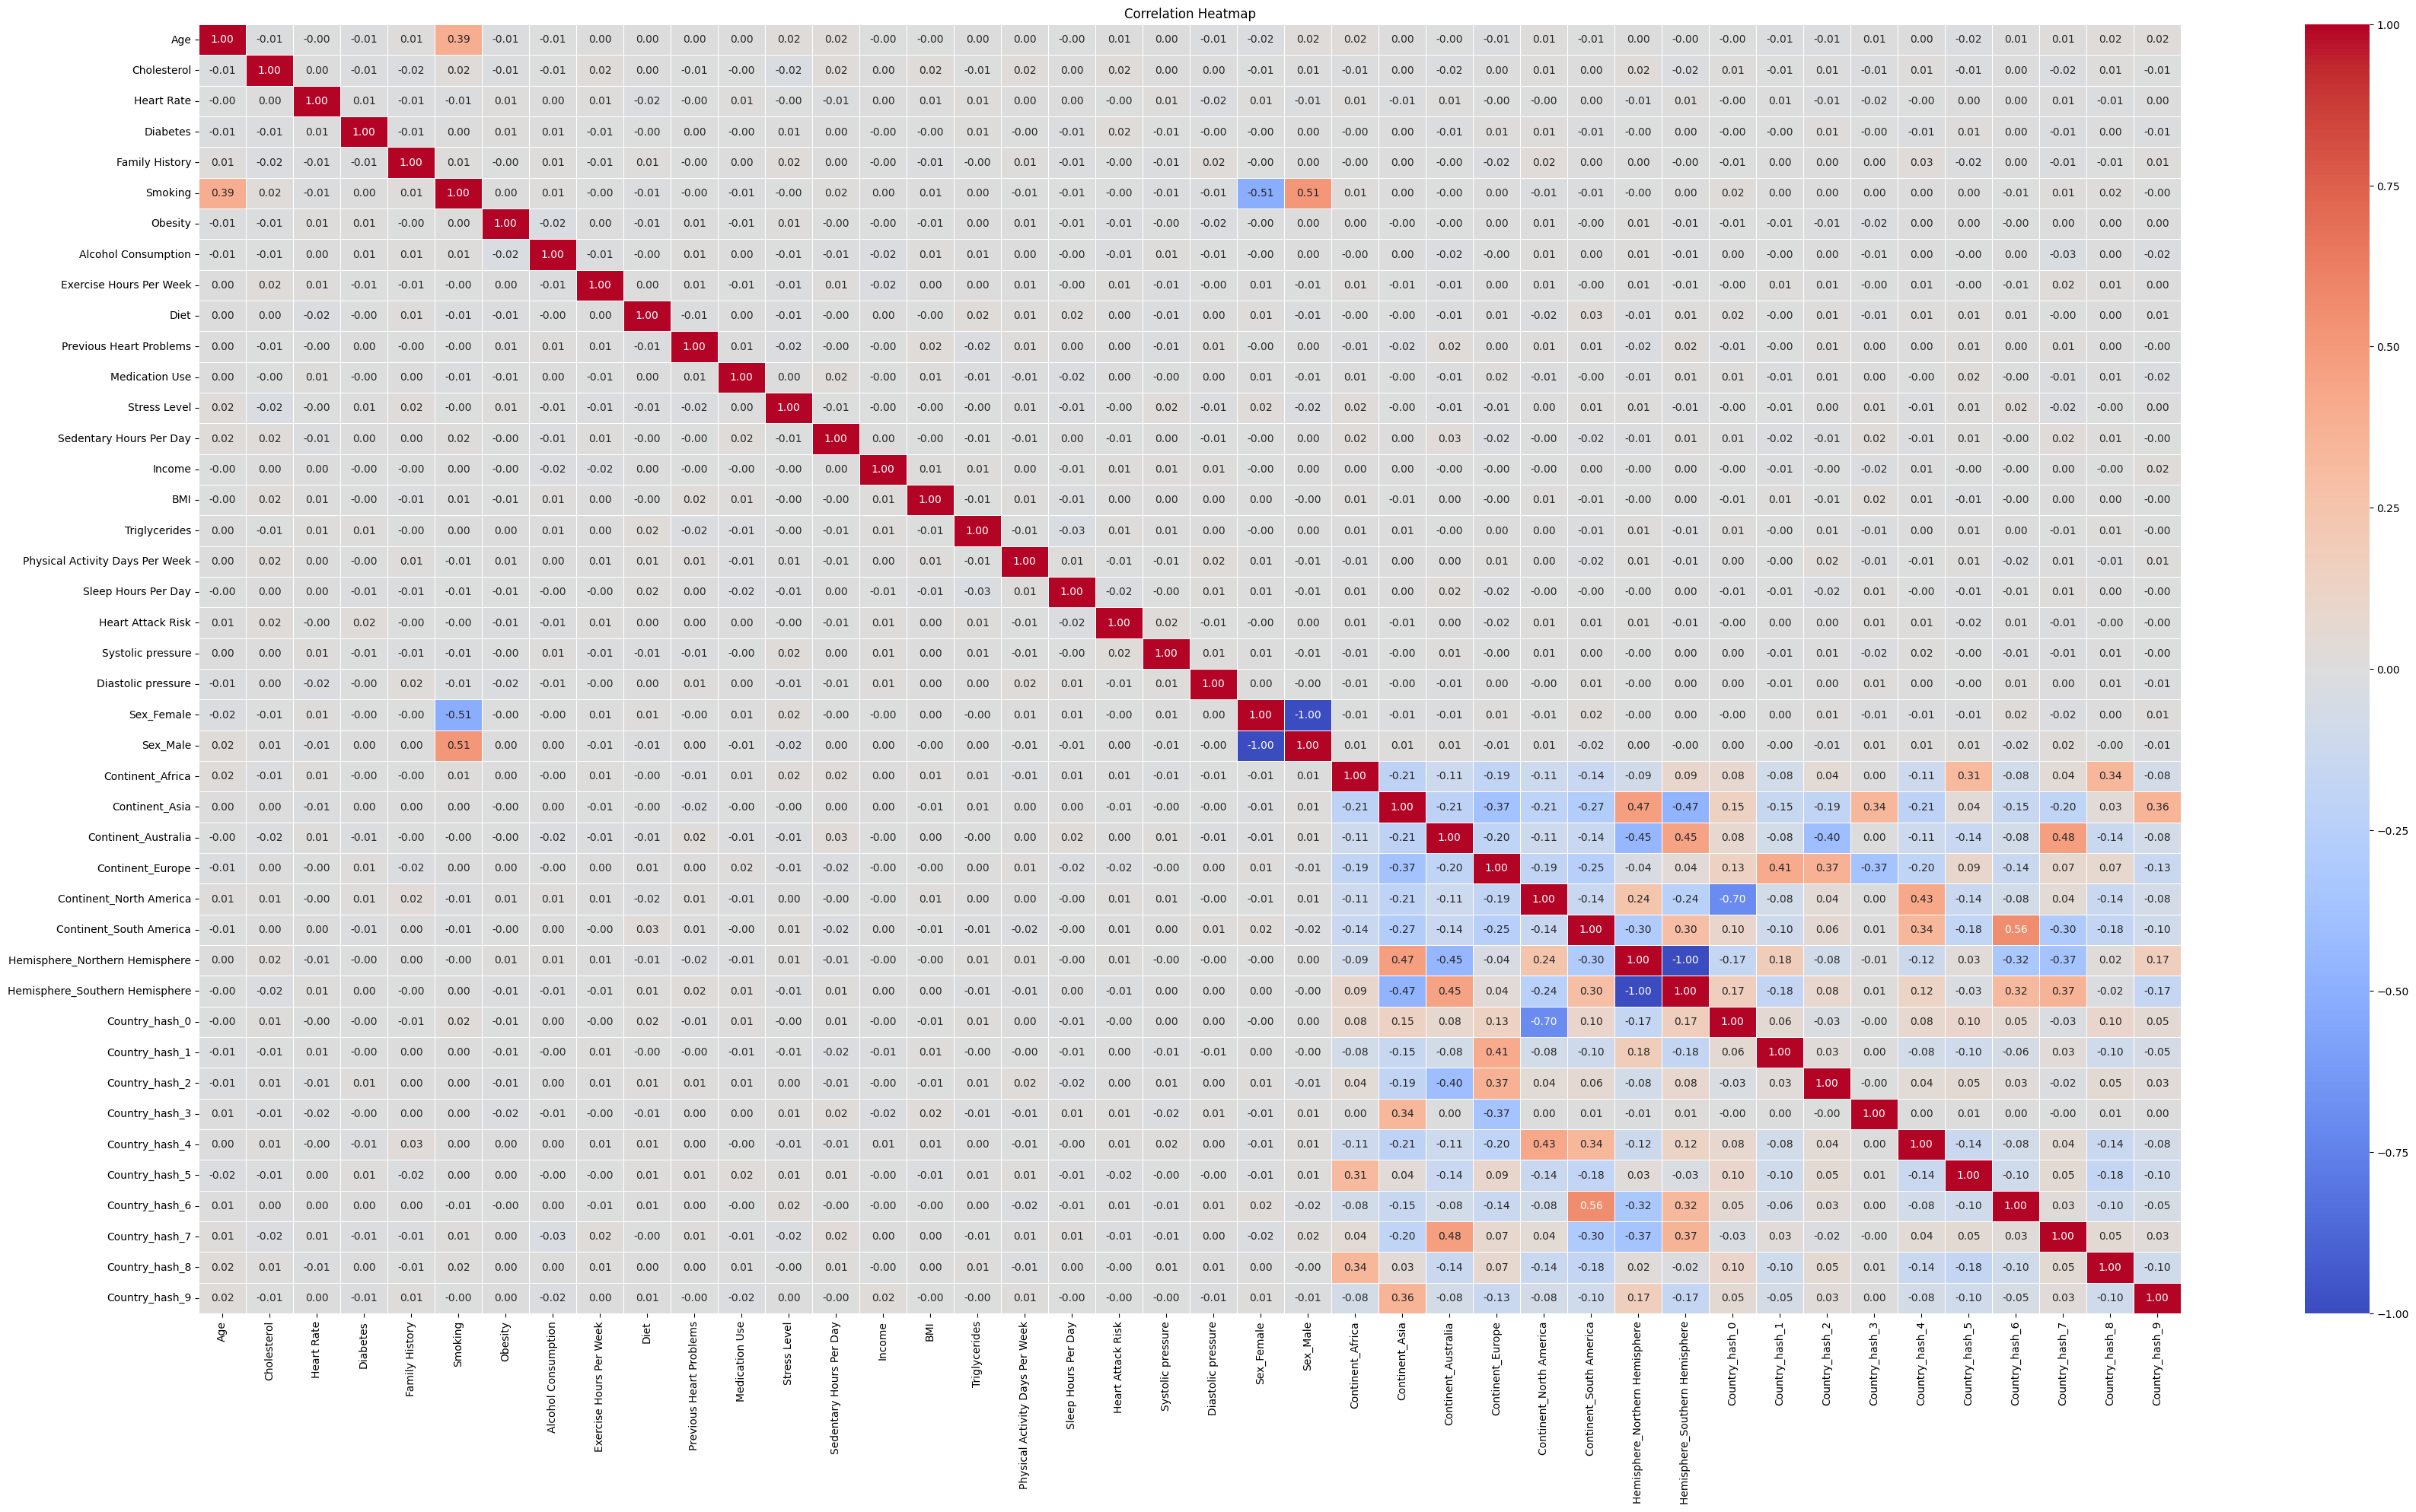

In [18]:
plt.figure(figsize=(42, 22))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [11]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)